## MALL Customer Segmentation

The goal is to identify types of Customers visiting the mall. Who are described as "good mall spenders:" Males or Females?
To identify different customers based on income and their spending which will help to create strategies in terms products and services to cater to their needs.

We start by importing the dependencies.
1. Numpy and Pandas for basic calculations and datatables
2. Matplotlib and its support libraries along with seaborn to plot different kinds of plots for visualisation
3. Sklearn packages for Kmeans calculation, Standardization of data.
4. OS to control flow from directory

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from mpl_toolkits.mplot3d import Axes3D

### Data Import

In [2]:
os.chdir="D:\Docs\Education\Data Science\Python projects\Python Classroom\C7 clustering"

In [3]:
raw_data=pd.read_csv("datasets_42674_74935_Mall_Customers.csv")

We read the data from the csv file and display it in the console.
On the first glace we notice we have 3 continuous variable and 1 categorical variable
Based on Income, Spending and gender we can create our cluster or groupings

### Understanding the DATA and its distribution

In [4]:
raw_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
raw_data.drop(["CustomerID"], axis=1, inplace=True)

In [6]:
raw_data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


Thus based on the above output we understand the data type of each category and we can assume that there is no null values bases on the fact that all 4 variables have equal non null counts

In [8]:
raw_data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


The max and min above and below the 75% and 25% gives us the sense of the data distributions although the presence of outliers cannot be ruled out as of now

### NULL value check

In [9]:
raw_data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

This confirms that there isn't presence of any null values.

### Gender and its demographics

Grouping data by Gender to indentify the spending habits of each gender and their respective incomes

In [10]:
gender_group_mean=raw_data.groupby(["Gender"]).mean().reset_index()
gender_group_mean

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Female,38.098214,59.250000,51.526786
1,Male,39.806818,62.227273,48.511364


<BarContainer object of 2 artists>

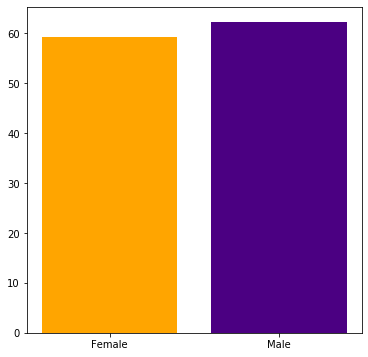

In [11]:
plt.figure(figsize=(6,6))
plt.bar(gender_group_mean["Gender"], gender_group_mean["Annual Income (k$)"], color=["orange","indigo"])

Males on average earns slightly more than females

<BarContainer object of 2 artists>

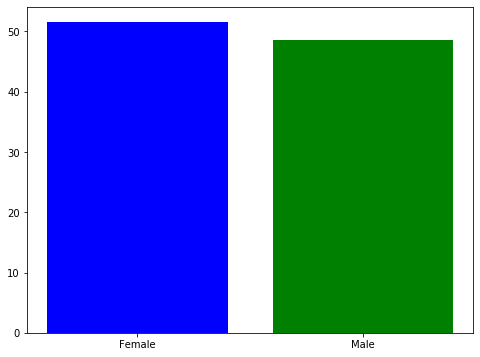

In [12]:
plt.figure(figsize=(8,6))
plt.bar(gender_group_mean["Gender"], gender_group_mean["Spending Score (1-100)"], color=["b","g"])

The Average spendings of females are larger than males

Thus we can conclude two aspects of the demographics:-
1. Saving of Females are lower than their male counterparts
2. Male population is larger than females still less count and spending of males suggest they are non users who can be converted to users in future
3. More male oriented products or themes or attractions can be placed/ utilized in the malls to draw the male crowds.
4. Female spends generally more on cloths, jewellary, kids store while males spends more on games, consumer electronics, foods and movies with no clear demarkation between gender roles are quite often noted.


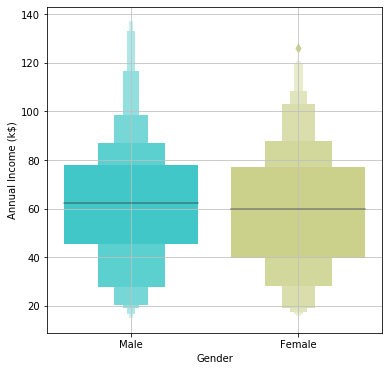

In [13]:
plt.figure(figsize=(6,6))
sns.boxenplot(raw_data["Gender"], raw_data["Annual Income (k$)"], palette ="rainbow")
plt.grid(color="silver")

From the above graph we can see the women salary is more distributed with large concentration of women earling betwwen $40k to $80k while the men's income ranged from $45k to $79k. The norrowing of graph indicates presence of outliers. The are generally have similar pay scales where as men have multiple pay scales.

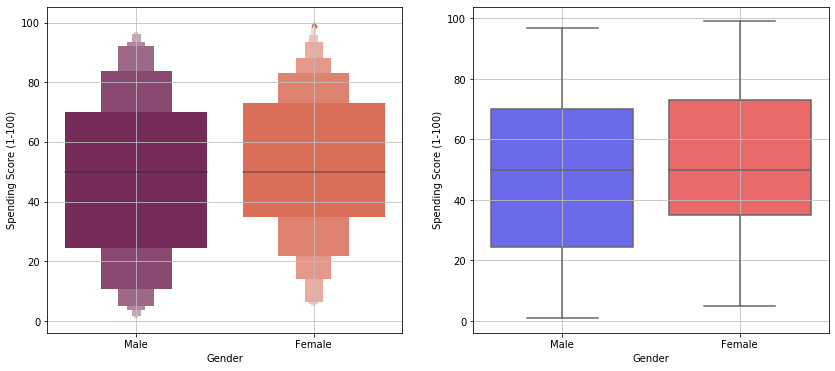

In [14]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1) #subplot rows, columns and Index
sns.boxenplot(raw_data["Gender"], raw_data["Spending Score (1-100)"], palette ="rocket")
plt.grid(color="silver")

plt.subplot(1,2,2)
sns.boxplot(raw_data["Gender"], raw_data["Spending Score (1-100)"], palette ="seismic")
plt.grid(color="silver")

From the above graph we can see that most male spendings range from $45k ~ $79k aprrox while female spendings range from $40k ~ ~ $78k approx. So there is an overall $4000 less spendings on male counterpart

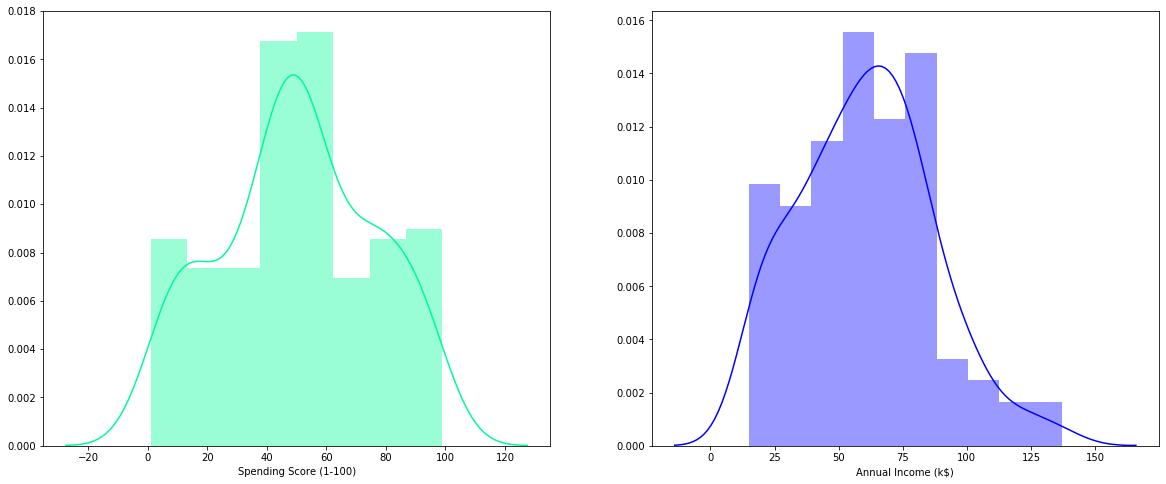

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
ax=sns.distplot(raw_data["Spending Score (1-100)"], color="mediumspringgreen")

plt.subplot(1,2,2)
ax=sns.distplot(raw_data["Annual Income (k$)"], color="blue")


Spending scores histogram is quite well balanced with its peak in the center (0 shewness) suggest the absense of noticeable outliers. Where as for Annual income it is very slightly skewed to the right indicate presence of minute outliers.

In [16]:
raw_data.groupby(["Gender"]).count().reset_index()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Female,112,112,112
1,Male,88,88,88


In the data we have more Female representatives than males


### Converting Categorical variable to Continuous

This is required specially when we will be going to fit_transform the whole dataset to standardscaler

In [17]:
raw_data["Gender"]=raw_data["Gender"].replace(["Male", "Female"], [0,1])
raw_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


### Standard Scaling of data.

#### Using Skleanr's StandardScaler()

The reason who standardize the data becore KMeans() creates clusters based on distances (Euclidean Distances). So all the values of each variable needs to be on the same scale so as to have equal distances.

A varibale whose value ranges like 500g will be perceived more dominant by the algorithm than 5kg despite the fact 5kg is bigger than 500g.

Thus we standardize the data by substracting the mean and dividing it with its is standard deviation, thus each data sample will have unit variance.

In [18]:
std_slr=StandardScaler()
raw_data_std=std_slr.fit_transform(raw_data)
raw_data_std

array([[-1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [ 0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [ 0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [ 0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [ 0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [ 0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [ 0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [ 0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [ 0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [ 0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [ 0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [-1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [-1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [ 0.88640526, -0.

In [19]:
raw_data_std=pd.DataFrame(raw_data_std, columns=raw_data.columns)
raw_data_std

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0.886405,-0.276302,2.268791,1.118061
196,0.886405,0.441365,2.497807,-0.861839
197,-1.128152,-0.491602,2.497807,0.923953
198,-1.128152,-0.491602,2.917671,-1.250054


Taking the standardized values of two main variable for clustering

In [20]:
data=raw_data_std.iloc[:,2:].values

### Finding the optimum Clustering

####  using KMeans via the Elbow Method and Silhouette scores

Kmeans is used to do the clusters and to find their centroids.

Basically we run the KMeans() from sklearn with most of its parameters as default except the number of clusters which we fun via a for loop to find out the optimum cluster size and its Silhouette score.

#### Kmeans:-

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares

This algorithm requires the number of clusters to be specified. Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes, another reason for required standardization.

https://scikit-learn.org/stable/modules/clustering.html#k-means

Parameters: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Silhoutte Scores

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). 

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

Parameters: Mostly at defaults with Labels set via KMeans.Labels_.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [21]:
wss=[]
sil=[]
for k in range(2,20):
    kmeans=KMeans(n_clusters=k, random_state=1, verbose=3, n_jobs=-1).fit(data)
    wss.append(kmeans.inertia_)
    labels=kmeans.labels_
    sil.append(silhouette_score(raw_data_std, labels, metric = 'euclidean'))
print(wss)
print(sil)

[269.0167937490666, 157.70400815035947, 108.92131661364357, 65.56840815571681, 55.057348270385994, 44.86475569922556, 37.15135706793106, 32.33704843502525, 29.687414500711988, 26.58210834069413, 24.800668398715622, 21.2609650798953, 19.478295334751586, 17.487465825041916, 16.557815714208843, 14.891534499611176, 13.986992323718024, 13.241902610743539]
[0.1786039617975216, 0.20835157921875855, 0.19928804186872562, 0.2271495449022707, 0.18540599872375743, 0.16653686057799477, 0.13670414991078458, 0.11972229361791693, 0.08942591855812436, 0.08975550223774555, 0.05818713832145462, 0.061670266080665385, 0.02607902694738874, 0.025733742138544322, 0.010914829647200119, 0.007854362034934104, -0.0013889902908391137, -0.00749668075716198]


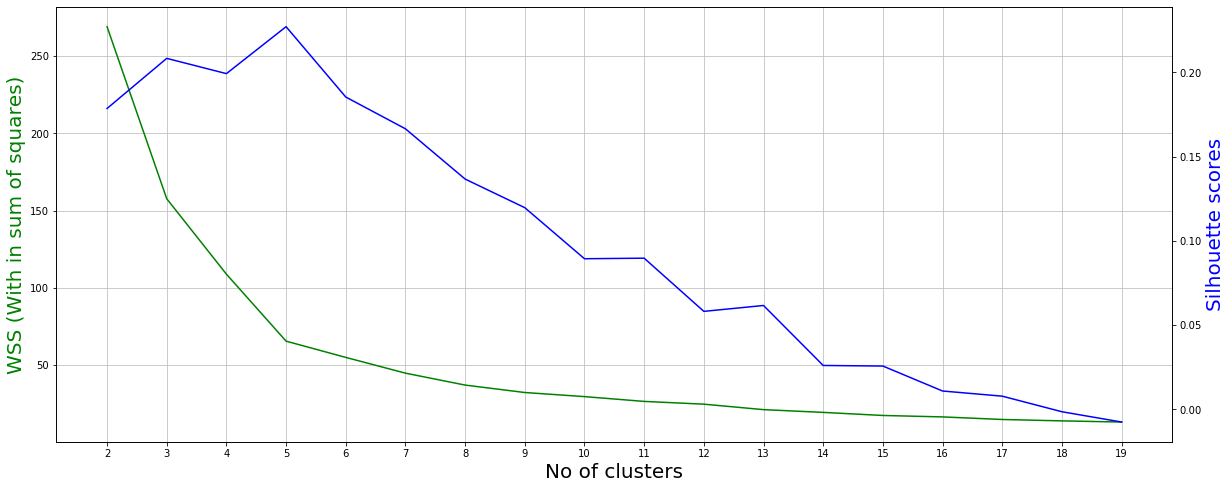

In [22]:
k=range(2,20)
fig,ax=plt.subplots(figsize=(20,8))
ax.set_facecolor('white')
ax.plot(k,wss, color="green")
ax.xaxis.set_major_locator(MaxNLocator(nbins=20,integer=True)) #forces the scales to be in integer, nbins as scales size.
ax.set_xlabel("No of clusters",color="black", fontsize=20)
ax.set_ylabel("WSS (With in sum of squares)", color="green", fontsize=20)
ax2=ax.twinx() #creates the second axis on the first plot (ax)
ax2.plot(k,sil, color="blue")
ax2.set_ylabel("Silhouette scores", color="Blue", fontsize=20)
ax.grid(True, color="silver")
plt.show()

As we see as the no of cluster increases the **WSS**(with-in sum of squares) decrease *sharply* upto 5 then the curve begin to flat out.
This is the elbow method where there is an initial steep decent and then the rate of decrease of WSS slows decreases suggesting that with the increase in new clusters there is **not much significant improvement to the model**

The silhoutte scores on the other hand tell us the max coefficent value of intercluster distance. We see it peaks out at 5 exactly where the elbow method's WSS steep decent begins to flat-out suggesting that *"5"* is the optimal choice for this dataset.

**Thus choosen no of clusters = 5**

In [23]:
n=5
kmeans=KMeans(n_clusters=n, random_state=1, verbose=3, n_jobs=-1).fit(data)
clusters=kmeans.labels_
centroids=kmeans.cluster_centers_
clusters

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [24]:
raw_data_std2=pd.DataFrame(pd.concat([raw_data_std, pd.Series(kmeans.labels_)], axis=1).rename(columns={0:"Clusters"})).copy()
raw_data2=pd.DataFrame(pd.concat([raw_data, pd.Series(kmeans.labels_)], axis=1).rename(columns={0:"Clusters"})).copy()
raw_data2

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,0,19,15,39,2
1,0,21,15,81,4
2,1,20,16,6,2
3,1,23,16,77,4
4,1,31,17,40,2
...,...,...,...,...,...
195,1,35,120,79,1
196,1,45,126,28,3
197,0,32,126,74,1
198,0,32,137,18,3


In [25]:
raw_data2_copy=raw_data2.copy()
raw_data2_copy.sort_values(["Clusters"], inplace=True)
raw_data_std2.sort_values(["Clusters"], inplace=True)
for i in range(0,n+1):
    raw_data2_copy["Clusters"]=raw_data2_copy["Clusters"].replace(i, chr(i+65))
    raw_data_std2["Clusters"]=raw_data_std2["Clusters"].replace(i, chr(i+65))
raw_data2_copy["Clusters"].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [26]:
raw_data2_copy

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
99,0,20,61,49,A
86,1,55,57,58,A
85,0,48,54,46,A
84,1,21,54,57,A
83,1,46,54,44,A
...,...,...,...,...,...
27,0,35,28,61,E
29,1,23,29,87,E
31,1,21,30,73,E
9,1,30,19,72,E


Text(0.5, 0, 'Spending Score')

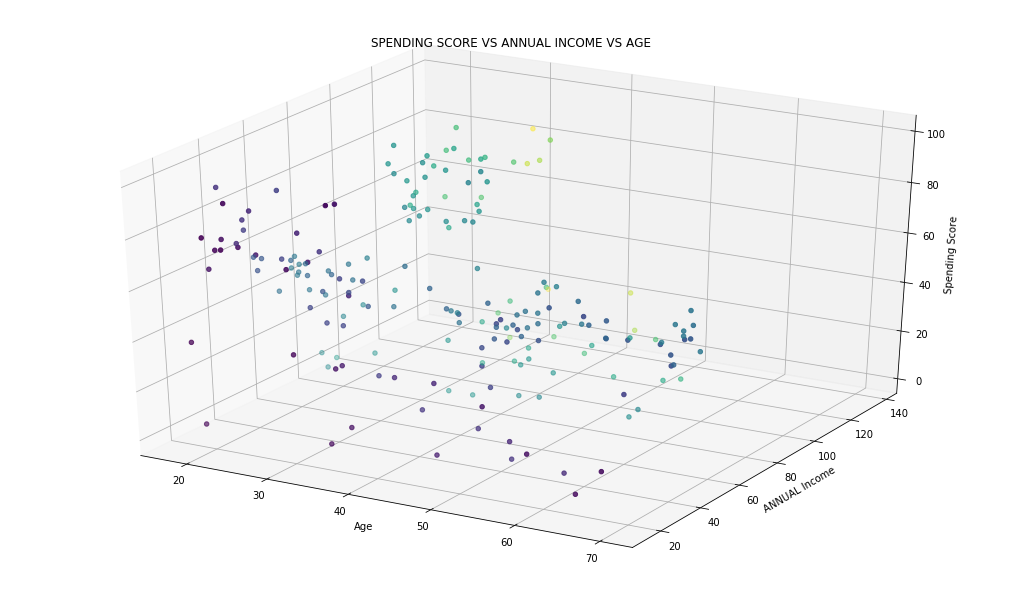

In [27]:
fig=plt.figure(figsize=(14,8))
ax=Axes3D(fig) #used to create 3D plots, part of matplotlib
x=np.array(raw_data["Age"])
y=np.array(raw_data["Annual Income (k$)"])
z=np.array(raw_data["Spending Score (1-100)"])
centroids=np.array(centroids)
ax.scatter(x, y,z, c=y)
plt.title('SPENDING SCORE VS ANNUAL INCOME VS AGE')
ax.set_xlabel('Age')
ax.set_ylabel('ANNUAL Income')
ax.set_zlabel('Spending Score')

A 3d plot showing the cluster compared with Age, Spending Score and Annual income.

In [28]:
x=raw_data.iloc[:,2:].values
y_means=kmeans.fit_predict(data)
print(y_means)
print("X shape:",x.shape)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]
X shape: (200, 2)


## Cluster plot and its interpretation

Code snippet: x[y_means==0,0] mean plot x whos cluster center is 0 (x[y_means==0]) and the second "0" is a postional argument of array X, X shape is (n, 2) so [0,1] are positional arguments. This arguements are used to set Annual income (pos=0) as X and Spending Score (pos=1) as Y

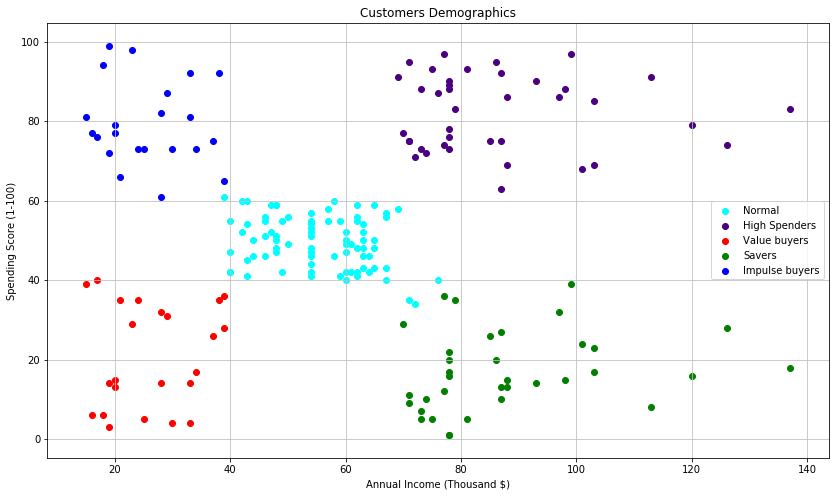

In [29]:
plt.figure(figsize=(14,8))

plt.scatter(x[y_means==0,0], x[y_means==0,1], color="cyan", label="Normal") #pos argument 0 for X and 1 for Y
plt.scatter(x[y_means==1,0], x[y_means==1,1], color="indigo", label="High Spenders") #y_means==1 for cluster center 1
plt.scatter(x[y_means==2,0], x[y_means==2,1], color="red", label="Value buyers")
plt.scatter(x[y_means==3,0], x[y_means==3,1], color="green", label="Savers")
plt.scatter(x[y_means==4,0], x[y_means==4,1], color="blue", label="Impulse buyers")

plt.xlabel("Annual Income (Thousand $)")
plt.ylabel("Spending Score (1-100)")
plt.legend(loc="right")
plt.grid(True, color="silver")
plt.title("Customers Demographics")
plt.show()

### Interpretation

***Above and Below*** are the two cluster outputs based on Income and Spending Habits.

Here we can see *5* total distinctive groups with minimum overlaps which suggest our clustering model did a pretty good job.


**Explainations and Suggestions**

Of the 5 total clusters we observe the following:-
1. The **Red** group lies in the bottom left of the plots have both least Income and Spending Capability. They are rational with their spending habits and thus will choose **Value** products which offer maximum benefit for least price. A **mass** marketing strategy will work in this type of consumer segment. **Offers, discounts** are quite attractive to this group. A all in one departmental stores like Walmarts, Big bazar (India) are preferred retailers.

2. The **Blue** group are mostly **Impulse buyers** who dont believe in saving. A good array of display with relevant digital marketing techniques like location based advertisement to offers can be used to attact this group. Display plays a key role in selling to these customers. Can be seen flocking around Exclusive branded stores as well as departmental all in one retails.

3. The **Skyblue** group behaves like an ideal group who likes to maintain a optimised life of earning and spendings. They are generally value buyers who like to buy products of low cost but gives the premium feel. Such customers will opt for EMI based shopping of high value CGs or like to upgrade an old item with a new. Can be seen flocking around Exclusive branded stores as well as departmental all in one retails.

4. The **Green** group are groups who are savers and don't believe in unnecessary expenditure. They generally buy a movie tickets sans the pop corn. Prefer to buy a lot from all in one departmental retails.

5. The **Indigo** group are high earners and high spenders thus a lucrative target for all types of goods. They are thrill, luxury seakers who don't bugde to spend the extra bug for good experience. Exclusive branded outlets are the most preferred choices here.



NB: Group colour are based on the above Graph only.

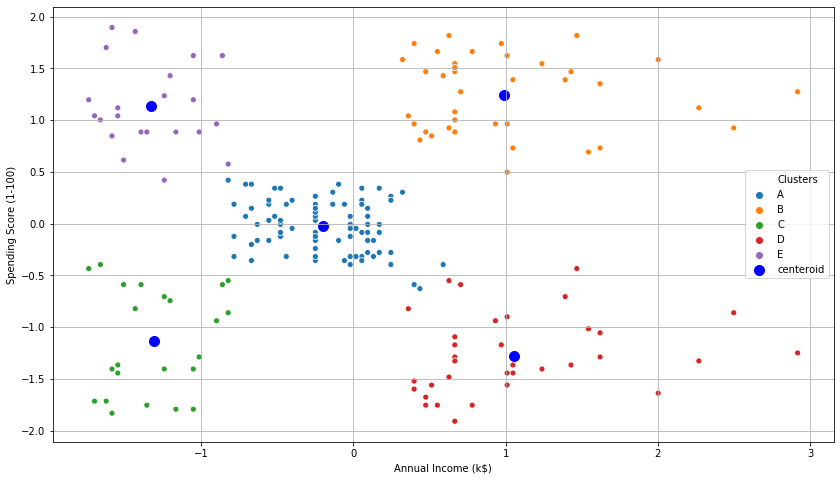

In [30]:
plt.figure(figsize=(14,8))
sns.scatterplot("Annual Income (k$)", "Spending Score (1-100)", hue="Clusters", data=raw_data_std2)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 100,c="Blue", label = 'centeroid')
plt.legend()
plt.grid()

The Centroids (centre of mass of a geometric object of uniform density.) of each groups highlighted in blue

### Compute the Silhouette Coefficient for each sample.

In [31]:
sample_silhouette_values=silhouette_samples(raw_data_std, clusters)
raw_data_std2["silhouette_values"]=sample_silhouette_values

In [32]:
raw_data_std2

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters,silhouette_values
99,-1.128152,-1.352802,0.016795,-0.046586,A,-0.180858
86,0.886405,1.159032,-0.135883,0.302808,A,0.476547
85,-1.128152,0.656665,-0.250391,-0.163051,A,0.219541
84,0.886405,-1.281035,-0.250391,0.263987,A,0.533802
83,0.886405,0.513132,-0.250391,-0.240694,A,0.039086
...,...,...,...,...,...,...
27,-1.128152,-0.276302,-1.242797,0.419273,E,0.393557
29,0.886405,-1.137502,-1.204627,1.428633,E,0.259227
31,0.886405,-1.281035,-1.166458,0.885132,E,0.304619
9,0.886405,-0.635135,-1.586321,0.846310,E,0.257527


In [33]:
raw_data_std2.groupby(["Clusters"])["silhouette_values"].mean()

Clusters
A    0.206094
B    0.125069
C    0.192844
D    0.331242
E    0.355898
Name: silhouette_values, dtype: float64

Silhoutte scores for each sample. Ranges from **-1 < score < +1**. Where samples in the same cluster are similar to each other, and well separated, where samples in different clusters are not very similar to each other.

**+1** suggest ***strong similarity*** with-in the group and ***dissimilarity*** with other groups (good clustering)

**0** suggest **no** similarity with-in the group and **no** dissimilarity with other group (no clustering)

**-1** suggest **strong dissimilarity** with-in the group and **similarity** with other groups (poor clustering)

In [34]:
silhouette_score(raw_data_std, clusters) #all data points

0.2271495449022707